## 1.聚类

### K-Means

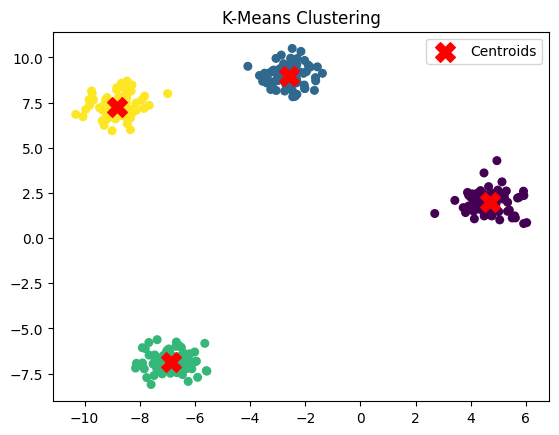

In [1]:
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# 1. 生成模拟数据
X, y = make_blobs(n_samples=300, centers=4, cluster_std=0.6, random_state=42)

# 2. 训练 K-Means
kmeans = KMeans(n_clusters=4, random_state=42, n_init=10)
y_pred = kmeans.fit_predict(X)

# 3. 可视化结果
plt.scatter(X[:, 0], X[:, 1], c=y_pred, s=30, cmap='viridis')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1],
            c='red', marker='X', s=200, label='Centroids')
plt.legend()
plt.title("K-Means Clustering")
plt.show()

### K-Medoids

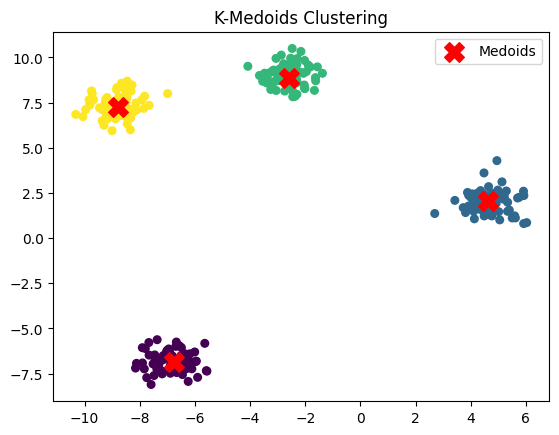

In [1]:
from sklearn.datasets import make_blobs
from sklearn_extra.cluster import KMedoids
import matplotlib.pyplot as plt

# 1. 生成模拟数据
X, y = make_blobs(n_samples=300, centers=4, cluster_std=0.6, random_state=42)

# 2. 训练 K-Medoids
kmedoids = KMedoids(n_clusters=4, random_state=42, metric='euclidean')
y_pred = kmedoids.fit_predict(X)

# 3. 可视化结果
plt.scatter(X[:, 0], X[:, 1], c=y_pred, s=30, cmap='viridis')
plt.scatter(kmedoids.cluster_centers_[:, 0], kmedoids.cluster_centers_[:, 1],
            c='red', marker='X', s=200, label='Medoids')
plt.legend()
plt.title("K-Medoids Clustering")
plt.show()

### 层次聚类

聚类结果： [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]


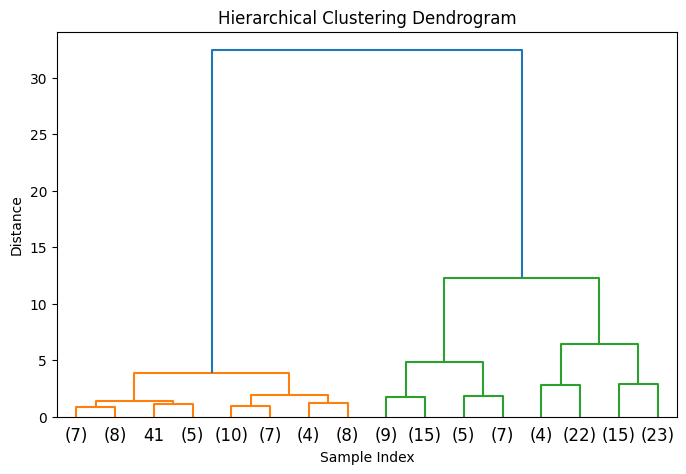

In [2]:
from sklearn.datasets import load_iris
from sklearn.cluster import AgglomerativeClustering
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage

# 1. 加载数据
iris = load_iris()
X = iris.data

# 2. 层次聚类 (AgglomerativeClustering)
model = AgglomerativeClustering(n_clusters=3, linkage='ward')
labels = model.fit_predict(X)

print("聚类结果：", labels[:20])

# 3. 绘制树状图
Z = linkage(X, method='ward')
plt.figure(figsize=(8, 5))
dendrogram(Z, truncate_mode='level', p=3)
plt.title("Hierarchical Clustering Dendrogram")
plt.xlabel("Sample Index")
plt.ylabel("Distance")
plt.show()

### DBSCAN & OPTICS

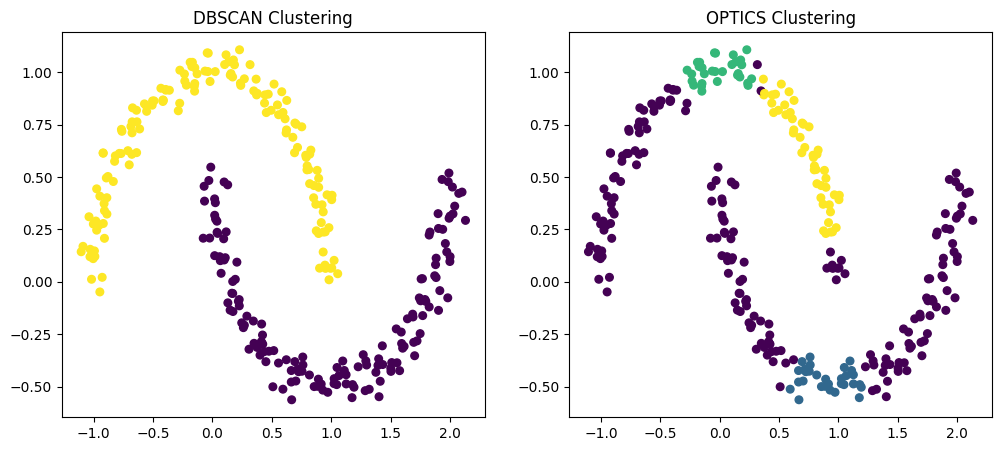

In [3]:
from sklearn.datasets import make_moons
from sklearn.cluster import DBSCAN
from sklearn.cluster import OPTICS
import matplotlib.pyplot as plt

# 生成非凸形数据
X, y = make_moons(n_samples=300, noise=0.05, random_state=42)

# DBSCAN 聚类
dbscan = DBSCAN(eps=0.2, min_samples=5)
labels_dbscan = dbscan.fit_predict(X)

# OPTICS 聚类
optics = OPTICS(min_samples=5, xi=0.05, min_cluster_size=0.1)
labels_optics = optics.fit_predict(X)

# 可视化 DBSCAN
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.scatter(X[:,0], X[:,1], c=labels_dbscan, cmap='viridis', s=30)
plt.title("DBSCAN Clustering")

# 可视化 OPTICS
plt.subplot(1,2,2)
plt.scatter(X[:,0], X[:,1], c=labels_optics, cmap='viridis', s=30)
plt.title("OPTICS Clustering")
plt.show()

## 2.降维与表示学习

### 主成分分析PCA

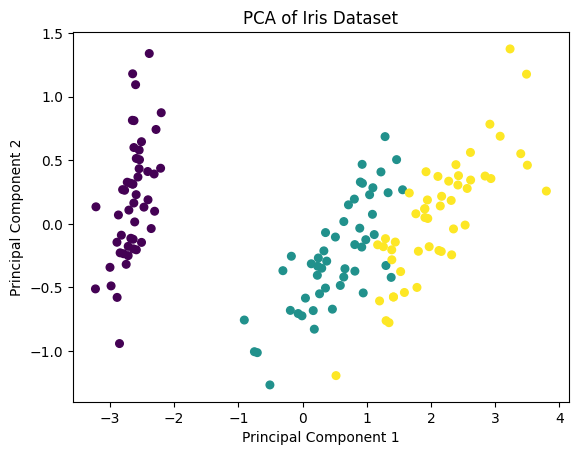

Explained variance ratio: [0.92461872 0.05306648]


In [4]:
from sklearn.datasets import load_iris
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# 1. 加载数据
iris = load_iris()
X = iris.data
y = iris.target

# 2. PCA 降维到 2 维
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# 3. 可视化
plt.scatter(X_pca[:,0], X_pca[:,1], c=y, cmap='viridis', s=30)
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.title("PCA of Iris Dataset")
plt.show()

# 4. 查看各主成分解释的方差比例
print("Explained variance ratio:", pca.explained_variance_ratio_)

### 独立成分分析ICA

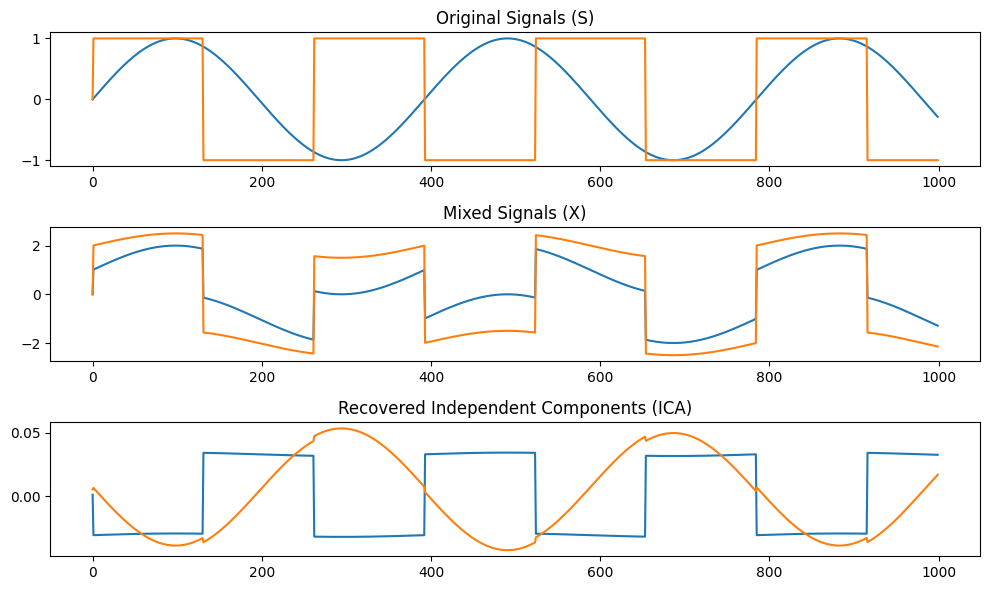

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import FastICA

# 生成模拟信号
np.random.seed(42)
time = np.linspace(0, 8, 1000)
s1 = np.sin(2 * time)                  # 正弦信号
s2 = np.sign(np.sin(3 * time))         # 方波信号
S = np.c_[s1, s2]

# 混合信号
A = np.array([[1, 1], [0.5, 2]])
X = S @ A.T

# 使用 FastICA 分离独立成分
ica = FastICA(n_components=2, random_state=42)
S_ = ica.fit_transform(X)
A_ = ica.mixing_

# 可视化
plt.figure(figsize=(10,6))

plt.subplot(3,1,1)
plt.plot(S)
plt.title("Original Signals (S)")

plt.subplot(3,1,2)
plt.plot(X)
plt.title("Mixed Signals (X)")

plt.subplot(3,1,3)
plt.plot(S_)
plt.title("Recovered Independent Components (ICA)")

plt.tight_layout()
plt.show()

### t-SNE,t-分布随机邻域嵌入

/home/wlt/anaconda3/envs/wlt/lib/python3.7/site-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,


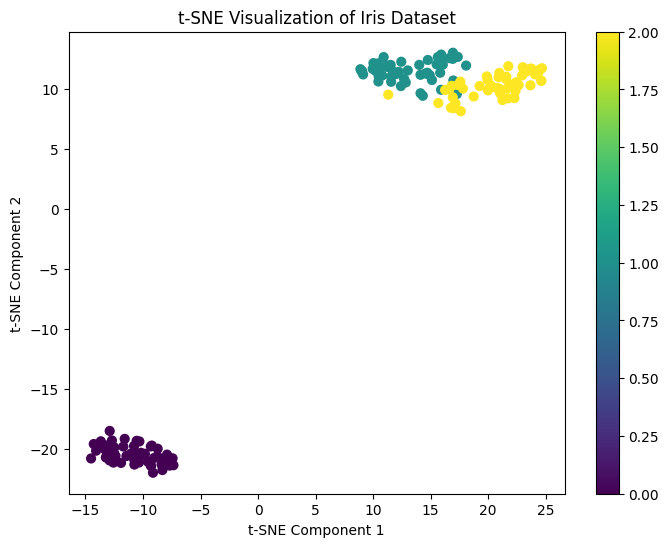

In [6]:
from sklearn.datasets import load_iris
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

# 加载数据
iris = load_iris()
X = iris.data
y = iris.target

# t-SNE 降维到 2 维
tsne = TSNE(n_components=2, perplexity=30, learning_rate=200, n_iter=1000, random_state=42)
X_tsne = tsne.fit_transform(X)

# 可视化
plt.figure(figsize=(8,6))
plt.scatter(X_tsne[:,0], X_tsne[:,1], c=y, cmap='viridis', s=40)
plt.xlabel("t-SNE Component 1")
plt.ylabel("t-SNE Component 2")
plt.title("t-SNE Visualization of Iris Dataset")
plt.colorbar()
plt.show()

### UMAP

OMP: Info #276: omp_set_nested routine deprecated, please use omp_set_max_active_levels instead.


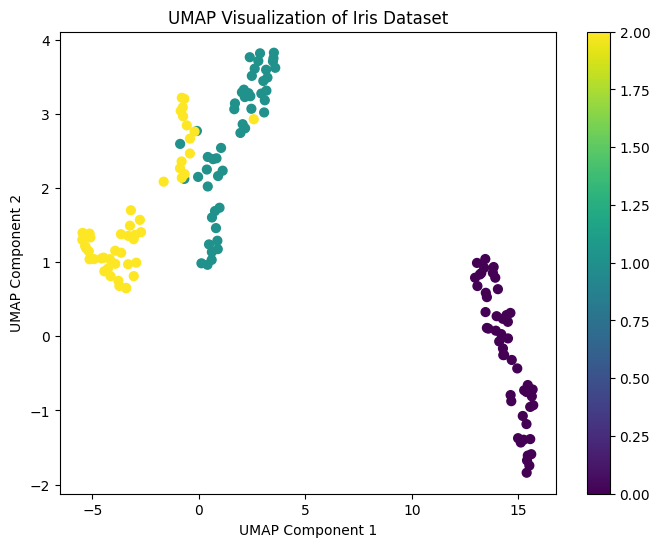

In [1]:
import umap.umap_ as umap
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt

# 加载数据
iris = load_iris()
X = iris.data
y = iris.target

# UMAP 降维到 2 维
umap_model = umap.UMAP(n_neighbors=15, min_dist=0.1, n_components=2, random_state=42)
X_umap = umap_model.fit_transform(X)

# 可视化
plt.figure(figsize=(8,6))
plt.scatter(X_umap[:,0], X_umap[:,1], c=y, cmap='viridis', s=40)
plt.xlabel("UMAP Component 1")
plt.ylabel("UMAP Component 2")
plt.title("UMAP Visualization of Iris Dataset")
plt.colorbar()
plt.show()

## 3.概率图模型

### 高斯混合模型

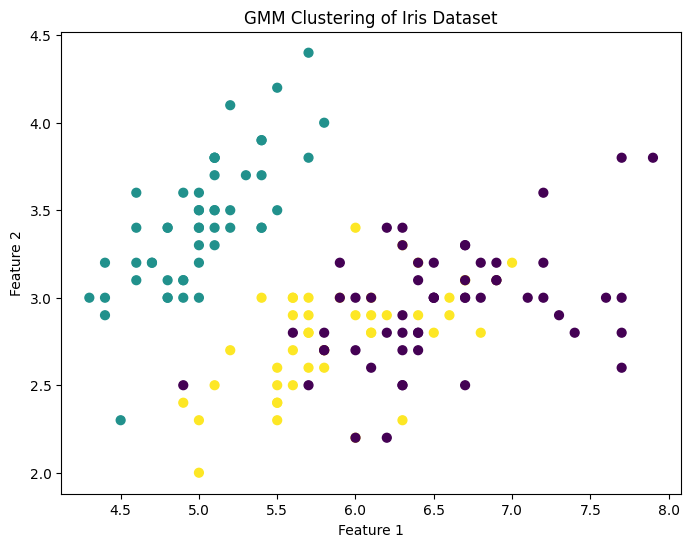

In [2]:
from sklearn.datasets import load_iris
from sklearn.mixture import GaussianMixture
import matplotlib.pyplot as plt

# 加载数据
iris = load_iris()
X = iris.data
y = iris.target

# 定义 GMM 模型
gmm = GaussianMixture(n_components=3, covariance_type='full', random_state=42)
gmm.fit(X)
labels = gmm.predict(X)

# 可视化前两维
plt.figure(figsize=(8,6))
plt.scatter(X[:,0], X[:,1], c=labels, cmap='viridis', s=40)
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.title("GMM Clustering of Iris Dataset")
plt.show()

### 隐马尔科夫模型

In [ ]:
import numpy as np
from hmmlearn import hmm

# 假设观测值 0,1,2（离散类别），隐藏状态 0,1
obs = np.array([[0],[1],[0],[2],[1],[0],[2],[1]])  # 注意列向量

# 定义 HMM，禁止自动初始化
model = hmm.MultinomialHMM(n_components=2, n_iter=100, random_state=42, init_params="")

# 手动设置参数
model.startprob_ = np.array([0.6, 0.4])
model.transmat_ = np.array([[0.7, 0.3],
                            [0.4, 0.6]])

# emissionprob_ 形状必须是 (n_components, n_features)
# n_features = 3，因为观测值 0,1,2 共 3 类
model.emissionprob_ = np.array([[0.5, 0.4, 0.1],
                                [0.1, 0.3, 0.6]])

# 训练 HMM
model.fit(obs)

# 解码隐藏状态序列
hidden_states = model.predict(obs)
print("隐藏状态序列:", hidden_states)


### 贝叶斯网络

In [2]:
import pandas as pd
from pgmpy.models import BayesianModel
from pgmpy.estimators import MaximumLikelihoodEstimator
from pgmpy.inference import VariableElimination

# 定义网络结构
model = BayesianModel([('Rain', 'Traffic'), ('Accident', 'Traffic')])

# 构造数据
data = pd.DataFrame({
    'Rain': [0, 0, 1, 1, 0, 1, 0, 1],
    'Accident': [0, 1, 0, 1, 0, 0, 1, 1],
    'Traffic': [0, 1, 1, 1, 0, 1, 1, 1]
})

# 参数学习
model.fit(data, estimator=MaximumLikelihoodEstimator)

# 推理
infer = VariableElimination(model)
posterior = infer.query(variables=['Traffic'], evidence={'Rain': 1, 'Accident': 0})
print(posterior)


/home/zhangting/.local/lib/python3.7/site-packages/pgmpy/models/BayesianModel.py:10: FutureWarning: BayesianModel has been renamed to BayesianNetwork. Please use BayesianNetwork class, BayesianModel will be removed in future.
  FutureWarning,


0it [00:00, ?it/s]

0it [00:00, ?it/s]

+------------+----------------+
| Traffic    |   phi(Traffic) |
+============+================+
| Traffic(0) |         0.0000 |
+------------+----------------+
| Traffic(1) |         1.0000 |
+------------+----------------+
